# Geometric Transformations of Images

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

## Scaling

In [2]:
img=cv2.imread('sIMG_2180.jpg')
res=cv2.resize(img,None,fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

cv2.namedWindow('image', cv2.WINDOW_AUTOSIZE)
cv2.imshow('image', img)
cv2.namedWindow('res', cv2.WINDOW_AUTOSIZE)
cv2.imshow('res', res)
#cv2.resizeWindow('res', res.shape[0], res.shape[1])
cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
#OR
height, width=img.shape[:2]
res=cv2.resize(img,(2*width,2*height), interpolation=cv2.INTER_CUBIC)

cv2.namedWindow('image', cv2.WINDOW_NORMAL)
cv2.imshow('image', img)
cv2.namedWindow('res', cv2.WINDOW_NORMAL)
cv2.imshow('res', res)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Class

In [4]:
img=cv2.imread('sIMG_2180.jpg')
res=cv2.resize(img,None,fx=20, fy=20, interpolation=cv2.INTER_NEAREST)

cv2.namedWindow('image', cv2.WINDOW_AUTOSIZE)
cv2.imshow('image', img)
cv2.namedWindow('res', cv2.WINDOW_AUTOSIZE)
cv2.imshow('res', res)
#cv2.resizeWindow('res', res.shape[0], res.shape[1])
cv2.waitKey(0)
cv2.destroyAllWindows()

## Translation

In [5]:
img=cv2.imread('sIMG_2180.jpg', 0)
rows,cols = img.shape

In [6]:
M = np.float32([[1,0,100],[0,1,50]])
dst = cv2.warpAffine(img, M, (cols, rows))

cv2.imshow('img', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Class

In [7]:
img=cv2.imread('ml.jpg', 0)
rows,cols = img.shape

x = 50
y = 100

In [8]:
M = np.float32([[1,0,x],[0,1,y]])

In [9]:
M

array([[  1.,   0.,  50.],
       [  0.,   1., 100.]], dtype=float32)

In [10]:
dst = cv2.warpAffine(img, M, (cols*2, rows*2))

cv2.imshow('img', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Rotation

In [11]:
img=cv2.imread('sIMG_2180.jpg', 0)
rows,cols = img.shape

In [12]:
M = cv2.getRotationMatrix2D((cols/2, rows/2), 90, 1)
dst = cv2.warpAffine(img, M, (cols, rows))

cv2.imshow('img', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Class

#### example 1

In [13]:
img=cv2.imread('ml.jpg', 0)
rows,cols = img.shape

In [14]:
M = cv2.getRotationMatrix2D((0, 0), 45, 1)
print(M)

[[ 0.70710678  0.70710678  0.        ]
 [-0.70710678  0.70710678  0.        ]]


In [15]:
dst = cv2.warpAffine(img, M, (cols, rows))

cv2.imshow('img', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### example 2

In [16]:
img=cv2.imread('ml.jpg', 0)
rows,cols = img.shape
M = cv2.getRotationMatrix2D((cols/2, rows/2), 90, 1)

# mouse callback function
def draw_circle(event,x,y,flags,param):
    if event == cv2.EVENT_MOUSEMOVE:
        cv2.circle(img,(x,y),5,(0,255,0),2)

# Create a black image, a window and bind the function to window
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)
t = 0
while(1):
    t+=1
    M = cv2.getRotationMatrix2D((cols/2,rows/2),t%360,1)
    # M = cv2.getRotationMatrix2D((cols/2,rows/2),t%360,2)
    dst = cv2.warpAffine(img,M,(cols,rows))
    cv2.imshow('image',dst)
    if cv2.waitKey(20) & 0xFF == 27:
        break
cv2.destroyAllWindows()

## Affine Transformation

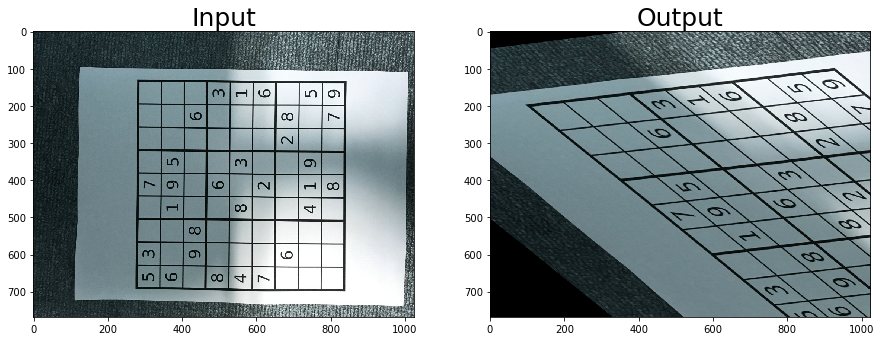

In [17]:
img=cv2.imread('sIMG_2168.jpg')
rows,cols,ch=img.shape

pts1=np.float32([[281,133],[652,138],[282,504]])
pts2=np.float32([[100,200],[652,138],[600,600]])

M=cv2.getAffineTransform(pts1,pts2)

dst=cv2.warpAffine(img,M,(cols,rows))

plt.figure(figsize=(15, 10))
plt.subplot(121),plt.imshow(img),plt.title('Input', fontsize=25)
plt.subplot(122),plt.imshow(dst),plt.title('Output', fontsize=25)
plt.show()

### Class

#### example 1

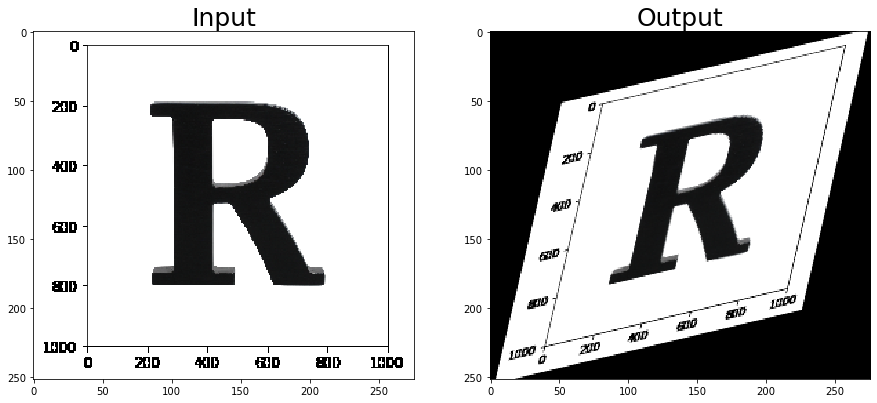

In [18]:
img=cv2.imread('r.png')
rows,cols,ch=img.shape

pts1=np.float32([[40,10],[257,10],[40,228]])
pts2=np.float32([[82,52],[257,10],[40,228]])

M=cv2.getAffineTransform(pts1,pts2)

dst=cv2.warpAffine(img,M,(cols,rows))

plt.figure(figsize=(15, 10))
plt.subplot(121),plt.imshow(img),plt.title('Input', fontsize=25)
plt.subplot(122),plt.imshow(dst),plt.title('Output', fontsize=25)
plt.show()

#### example 2

In [19]:
img=cv2.imread('r.png', 0)
rows,cols = img.shape

mousex = 0
mousey = 0

# mouse callback function
def draw_circle(event,x,y,flags,param):
    if event == cv2.EVENT_MOUSEMOVE:
        mousex = x
        mousey = y        
        cv2.circle(img,(x,y),5,(0,255,0),2)

# Create a black image, a window and bind the function to window
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)

pts1=np.float32([[40,10],[257,10],[40,228]])
while(1):
    pts2 = np.float32([[mousex, mousey], [257, 10], [40, 228]])
    M=cv2.getAffineTransform(pts1,pts2)
    dst = cv2.warpAffine(img,M,(cols,rows))
    
    cv2.imshow('image',dst)
    if cv2.waitKey(20) & 0xFF == 27:
        break
        
cv2.destroyAllWindows()

## Perspective Transformation

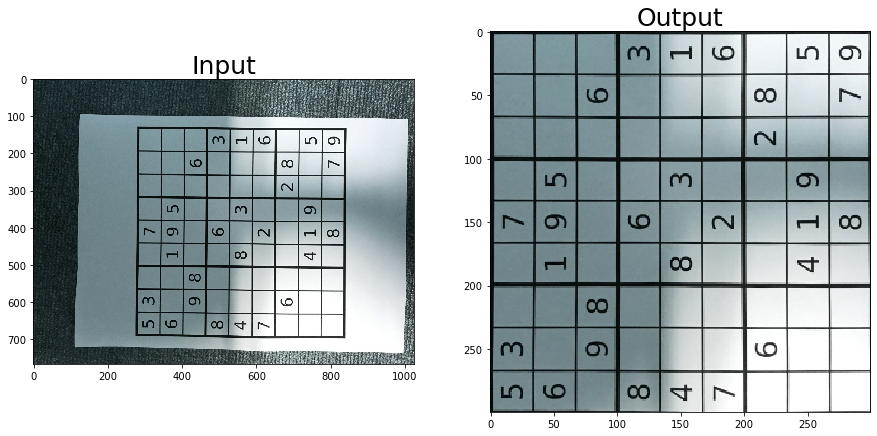

In [20]:
img=cv2.imread('sIMG_2168.jpg')
rows,cols,ch=img.shape

pts1=np.float32([[281,133],[840,137],[278,690],[835,695]])
pts2=np.float32([[0,0],[300,0],[0,300],[300,300]])

M=cv2.getPerspectiveTransform(pts1,pts2)

dst=cv2.warpPerspective(img,M,(300,300))

plt.figure(figsize=(15, 10))
plt.subplot(121),plt.imshow(img),plt.title('Input', fontsize=25)
plt.subplot(122),plt.imshow(dst),plt.title('Output', fontsize=25)
plt.show()

### Class

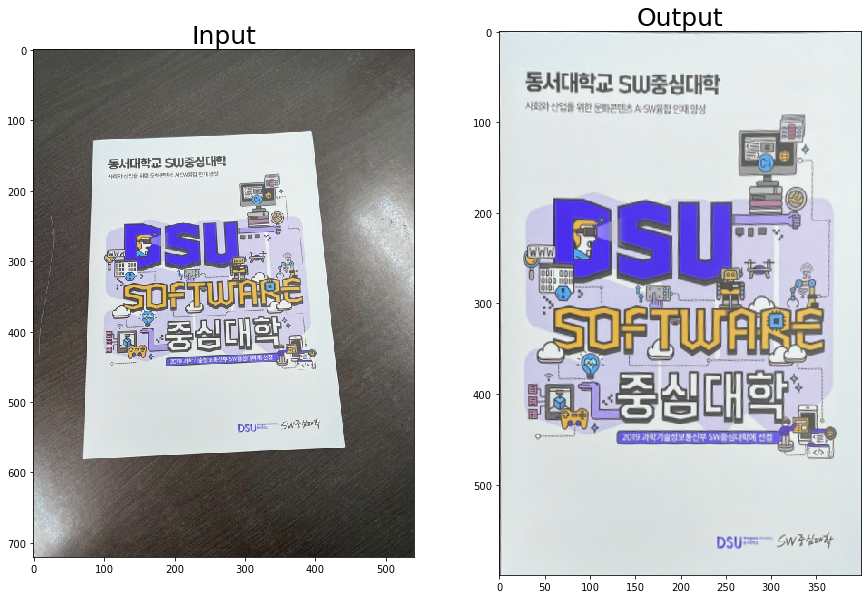

In [21]:
img=cv2.imread('book.jpg')
rows,cols,ch=img.shape

pts1=np.float32([[85,129],[392,116],[69,580],[441,563]])
pts2=np.float32([[0,0],[400,0],[0,600],[400,600]])

M=cv2.getPerspectiveTransform(pts1,pts2)

dst=cv2.warpPerspective(img,M,(400,600))

plt.figure(figsize=(15, 10))
plt.subplot(121),plt.imshow(img),plt.title('Input', fontsize=25)
plt.subplot(122),plt.imshow(dst),plt.title('Output', fontsize=25)
plt.show()